### Import required libraries

In [239]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### read the data

In [240]:
data=pd.read_csv("KNNAlgorithmDataset.csv")
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

### check the shape of the data
- There are 569 rows and 33 features present in this dataset

In [241]:
data.shape

(569, 33)

###  features details
- Mean (_mean) – average value across the cell nuclei

- Standard Error (SE) (_se) – variation in the values

- Worst (_worst) – the largest (mean of the three largest values)


radius:	  Average distance from center to points on the perimeter

texture:	Standard deviation of gray-scale values

perimeter:	  The perimeter of the nucleus boundary

area:	  The area inside the nucleus boundary

smoothness:	   Local variation in radius lengths (how smooth the contour is)

compactness:	  (perimeter² / area - 1.0) — higher values mean the shape is less compact

concavity:	    Severity of concave portions of the contour

concave points:	     Number of concave portions of the contour

symmetry:	   How symmetric the shape is

fractal dimension:	  "Roughness" of the contour (1 = line, 2 = filled shape)

In [242]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### Information about the data
- The dataset contains 569 entries with 33 features, including 31 float-type features, 1 integer ID, and 1 object-type target label (diagnosis). There are no missing values, making the dataset clean and ready for analysis or modeling.

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### check duplicates
- The dataset contains no duplicate records, ensuring that each entry is unique and reliable for analysis or modeling.

In [244]:
data.duplicated().sum()

0

### check null values
- The dataset is complete with no missing or null values, ensuring data integrity for accurate analysis.

In [245]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Data cleaning
- The unnecessary column 'Unnamed: 32' has been removed from the dataset to streamline the data for analysis. 

In [246]:
data=data.drop(["Unnamed: 32"], axis=1)

### Unique values
- The target feature contains two unique classes: benign (357 instances) and malignant (212 instances). Here, benign indicates a non-cancerous (good) tumor, while malignant represents a cancerous (bad) tumor.

In [247]:
data["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

### convert categories to numerical
- The target labels 'malignant' and 'benign' have been converted to numerical values for model building, and the original 'diagnosis' column has been removed after creating the new target column to keep the dataset clean and focused.

In [248]:
data["target"]=data["diagnosis"].replace({"M":1,"B":0}, regex=True)
data=data.drop("diagnosis", axis=1)

C:\Users\Manisha\AppData\Local\Temp\ipykernel_7520\475844744.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["target"]=data["diagnosis"].replace({"M":1,"B":0}, regex=True)


### check the statistical summary of the data

In [249]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

           target  
count  569.000000  
mean     0.372583  
std      0.483918  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  

[8 rows x 32 columns]

### Check correlation between features

In [250]:
data.corr(numeric_only=True)

id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.679090      0.275869        0.691765   
texture_se              -0.007526    -0.097317      0.386358       -0.086761   
perimeter_se             0.137331     0.674172      0.281673        0.693135   
area_se                  0.177742     0.735864      0.259845        0.744983   
smoothness_se            0.096781    -0.222600      0.006614       -0.202694   
compactness_se           0.033961     0.206000      0.191975        0.250744   
concavity_se             0.055239     0.194204      0.143293        0.228082   
concave points_se        0.078768     0.376169      0.163851        0.407217   
symmetry_se             -0.017306    -0.104321      0.009127       -0.081629   
fractal_dimension_se     0.025725    -0.042641      0.054458       -0.005523   
radius_worst             0.082405     0.969539      0.352573        0.969476   
texture_worst            0.064720     0.297008      0.912045        0.303038   
perimeter_worst          0.079986     0.965137      0.358040        0.970387   
area_worst               0.107187     0.941082      0.343546        0.941550   
smoothness_worst         0.010338     0.119616      0.077503        0.150549   
compactness_worst       -0.002968     0.413463      0.277830        0.455774   
concavity_worst          0.023203     0.526911      0.301025        0.563879   
concave points_worst     0.035174     0.744214      0.295316        0.771241   
symmetry_worst          -0.044224     0.163953      0.105008        0.189115   
fractal_dimension_worst -0.029866     0.007066      0.119205        0.051019   
target                   0.039769     0.730029      0.415185        0.742636   

                         area_mean  smoothness_mean  compactness_mean  \
id                        0.096893        -0.012968          0.000096   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
con

## Univariate Analysis

### aggregate values for numerical features
- Statistical metrics such as mean, median, standard deviation (std), skewness, minimum, and maximum have been calculated for each numerical feature to gain insights into the data distribution and variability.

In [251]:
for i in data.select_dtypes(include="number").columns.tolist():
    print(i,":", data[i].agg(["mean","median","skew","std","min","max"]))

id : mean      3.037183e+07
median    9.060240e+05
skew      6.473752e+00
std       1.250206e+08
min       8.670000e+03
max       9.113205e+08
Name: id, dtype: float64
radius_mean : mean      14.127292
median    13.370000
skew       0.942380
std        3.524049
min        6.981000
max       28.110000
Name: radius_mean, dtype: float64
texture_mean : mean      19.289649
median    18.840000
skew       0.650450
std        4.301036
min        9.710000
max       39.280000
Name: texture_mean, dtype: float64
perimeter_mean : mean       91.969033
median     86.240000
skew        0.990650
std        24.298981
min        43.790000
max       188.500000
Name: perimeter_mean, dtype: float64
area_mean : mean       654.889104
median     551.100000
skew         1.645732
std        351.914129
min        143.500000
max       2501.000000
Name: area_mean, dtype: float64
smoothness_mean : mean      0.096360
median    0.095870
skew      0.456324
std       0.014064
min       0.052630
max       0.163400
Name: 

### Histogram
- Features such as radius_mean, texture_mean, perimeter_mean, smoothness_mean, and symmetry_mean follow a normal distribution, while area_mean, compactness_mean, concavity_mean, concave points_mean, and fractal_dimension_mean exhibit asymmetric (skewed) distributions.

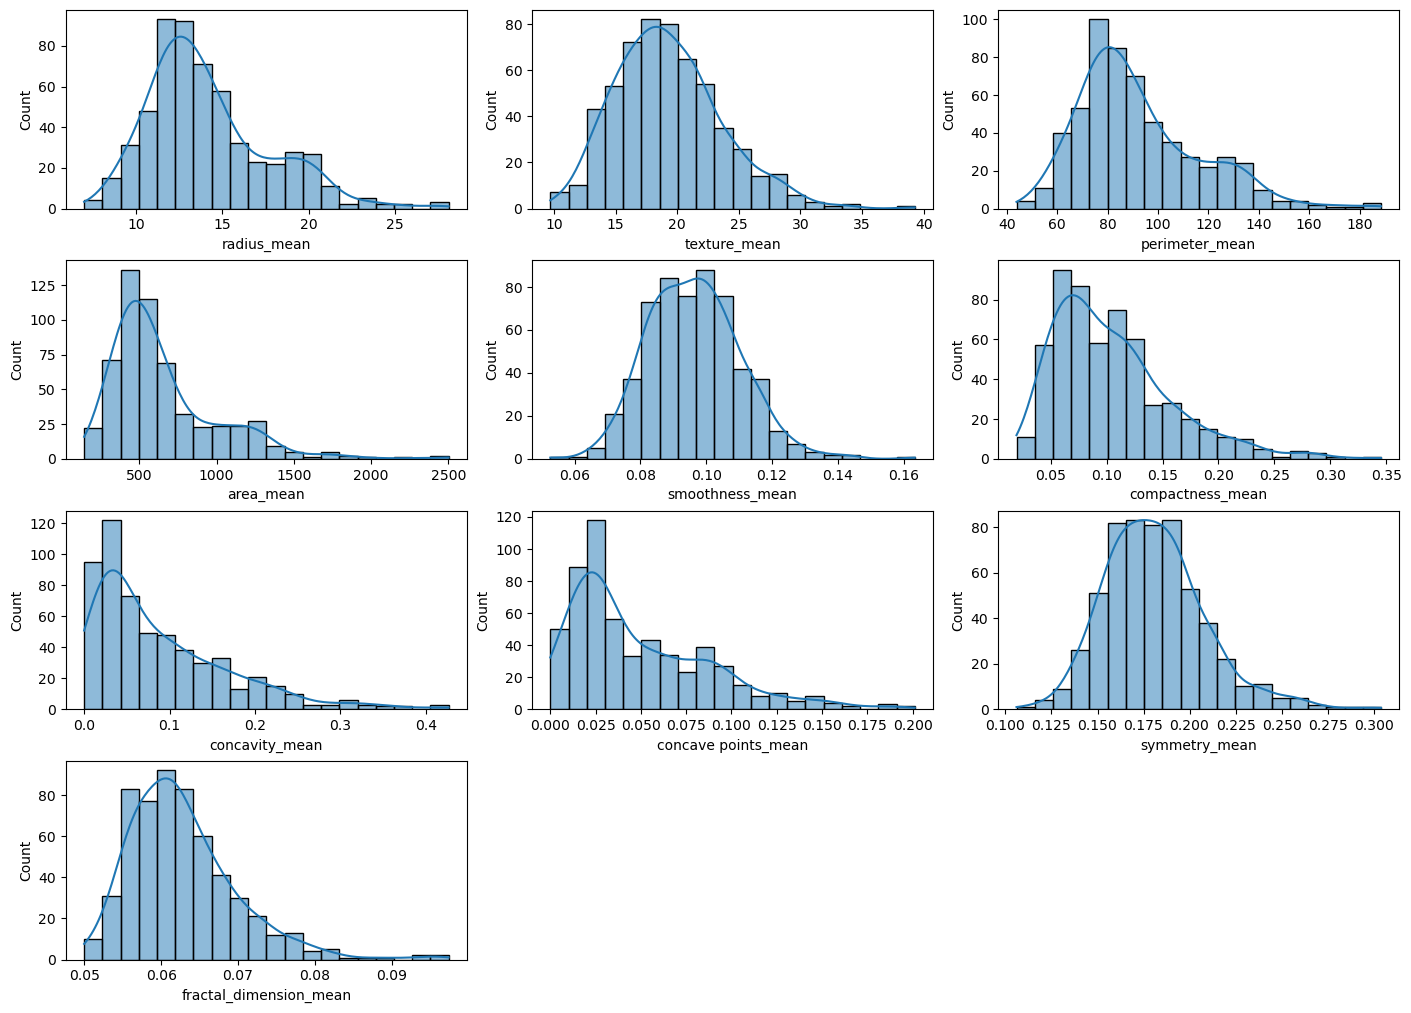

In [252]:
plt.figure(figsize=(14,12), layout="constrained")
plt.subplot(5,3,1)
sns.histplot(data["radius_mean"], kde=True, bins=20)
plt.subplot(5,3,2)
sns.histplot(data["texture_mean"], kde=True, bins=20)
plt.subplot(5,3,3)
sns.histplot(data["perimeter_mean"], kde=True, bins=20)
plt.subplot(5,3,4)
sns.histplot(data["area_mean"], kde=True, bins=20)
plt.subplot(5,3,5)
sns.histplot(data["smoothness_mean"], kde=True, bins=20)
plt.subplot(5,3,6)
sns.histplot(data["compactness_mean"], kde=True, bins=20)
plt.subplot(5,3,7)
sns.histplot(data["concavity_mean"], kde=True, bins=20)
plt.subplot(5,3,8)
sns.histplot(data["concave points_mean"], kde=True, bins=20)
plt.subplot(5,3,9)
sns.histplot(data["symmetry_mean"], kde=True, bins=20)
plt.subplot(5,3,10)
sns.histplot(data["fractal_dimension_mean"], kde=True, bins=20)
plt.show()

- All the _se (standard error) features, including radius_se, texture_se, and others, are right-skewed, indicating the presence of outliers or a concentration of lower values. This skewness suggests the need for potential transformation or scaling before model training.

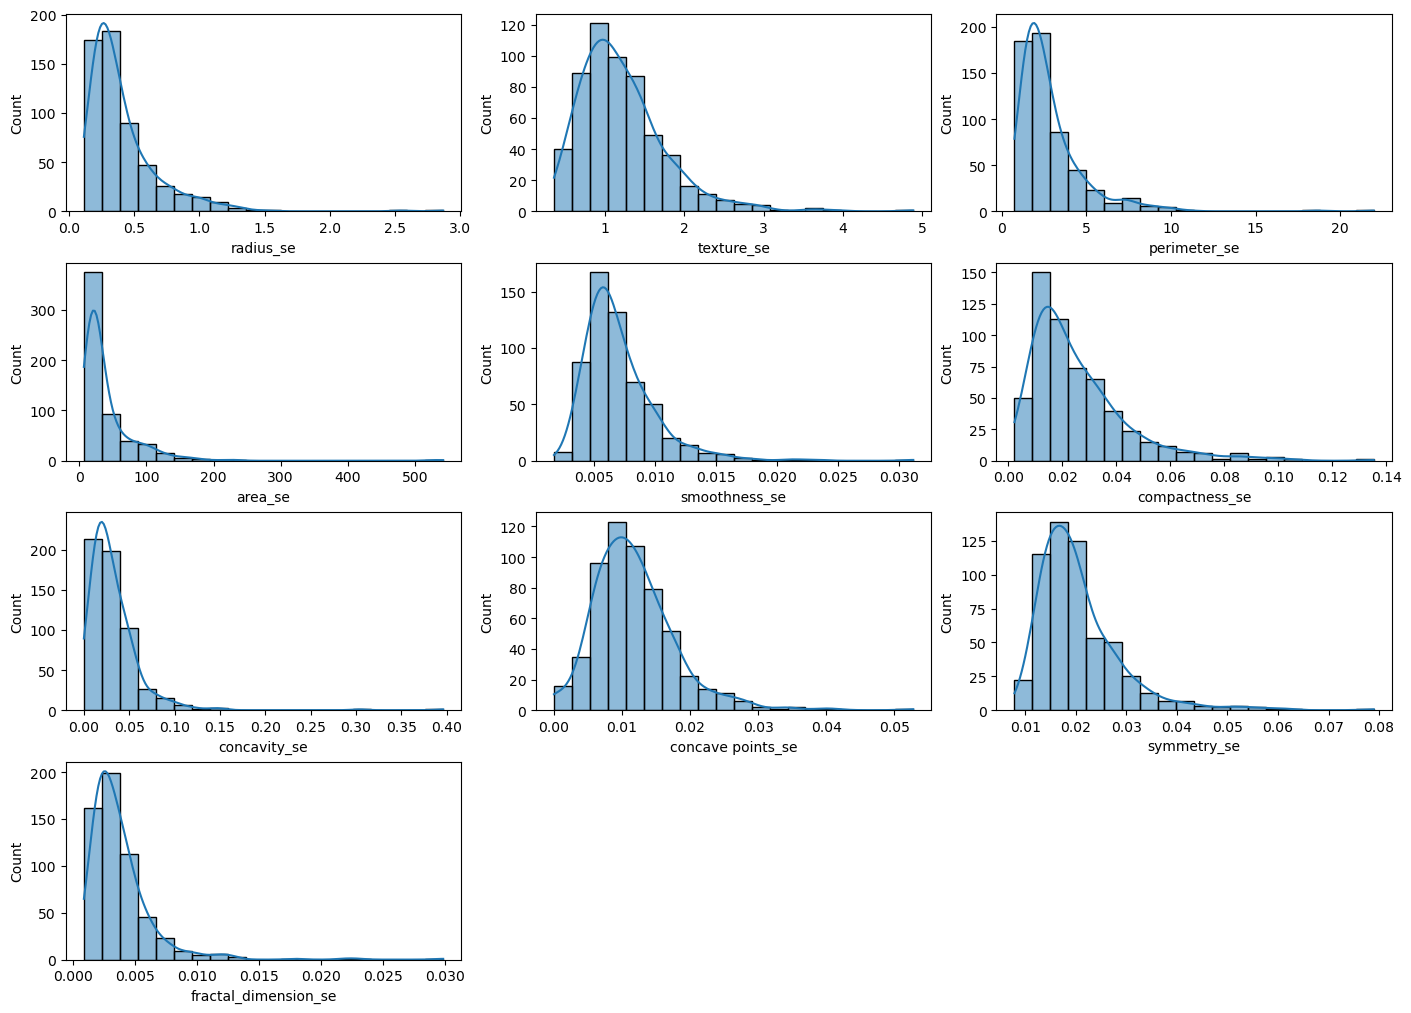

In [253]:
plt.figure(figsize=(14,12), layout="constrained")
plt.subplot(5,3,1)
sns.histplot(data["radius_se"], kde=True, bins=20)
plt.subplot(5,3,2)
sns.histplot(data["texture_se"], kde=True, bins=20)
plt.subplot(5,3,3)
sns.histplot(data["perimeter_se"], kde=True, bins=20)
plt.subplot(5,3,4)
sns.histplot(data["area_se"], kde=True, bins=20)
plt.subplot(5,3,5)
sns.histplot(data["smoothness_se"], kde=True, bins=20)
plt.subplot(5,3,6)
sns.histplot(data["compactness_se"], kde=True, bins=20)
plt.subplot(5,3,7)
sns.histplot(data["concavity_se"], kde=True, bins=20)
plt.subplot(5,3,8)
sns.histplot(data["concave points_se"], kde=True, bins=20)
plt.subplot(5,3,9)
sns.histplot(data["symmetry_se"], kde=True, bins=20)
plt.subplot(5,3,10)
sns.histplot(data["fractal_dimension_se"], kde=True, bins=20)
plt.show()

- Features like texture_worst, smoothness_worst, and concave points_worst show a more balanced or near-normal distribution, while the remaining _worst features are right-skewed, indicating a concentration of lower values with some high-value outliers. This pattern may affect model sensitivity and could benefit from normalization or transformation.

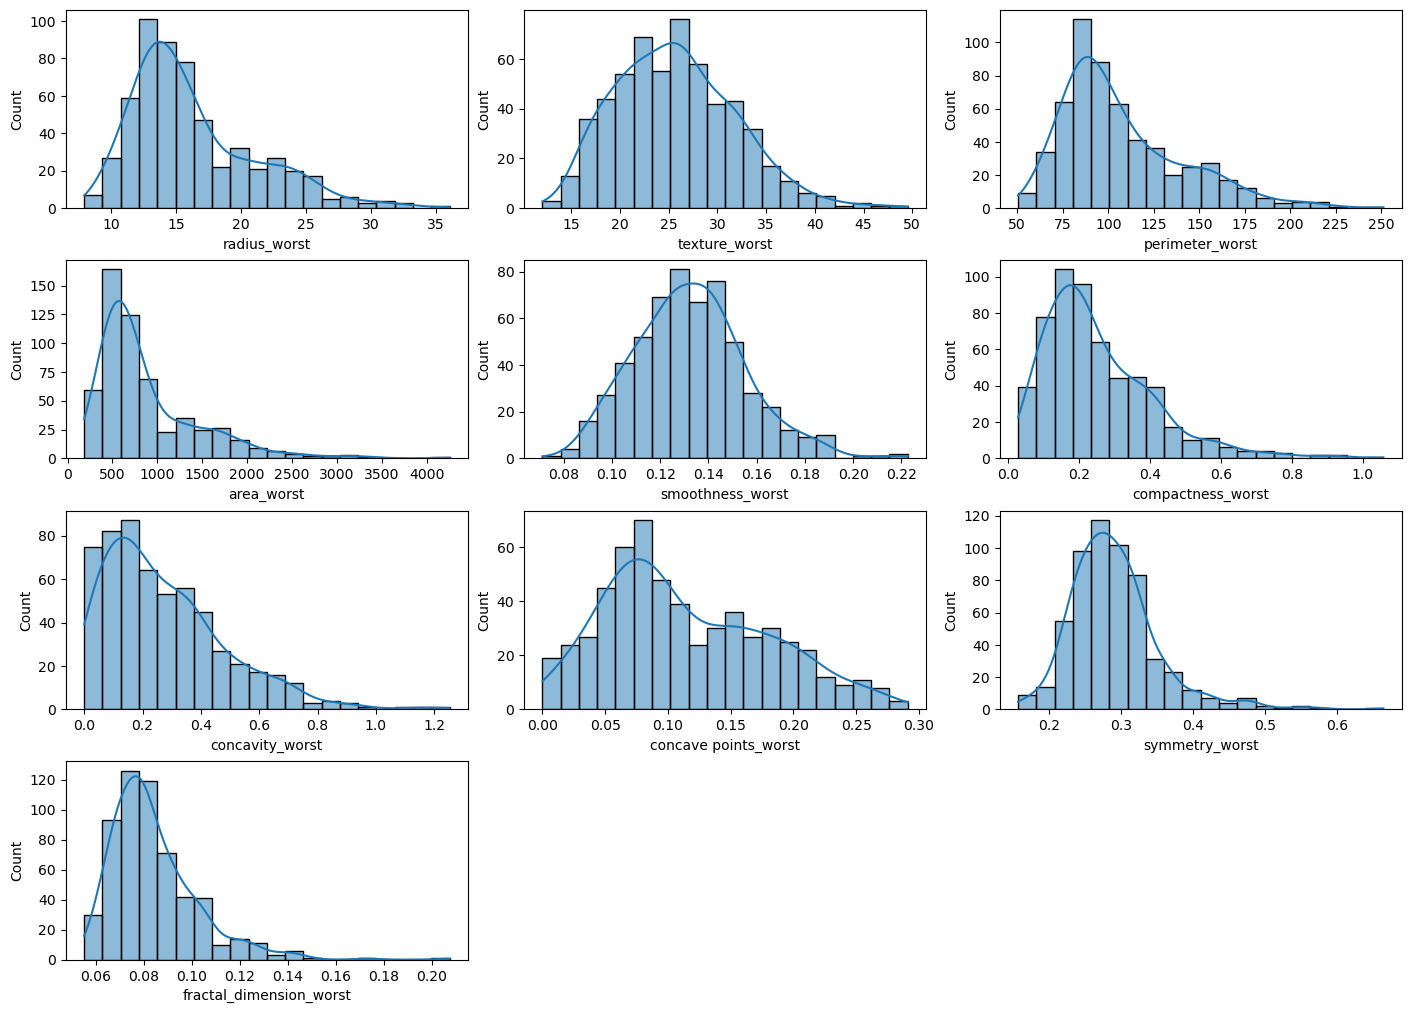

In [254]:
plt.figure(figsize=(14,12), layout="constrained")
plt.subplot(5,3,1)
sns.histplot(data["radius_worst"], kde=True, bins=20)
plt.subplot(5,3,2)
sns.histplot(data["texture_worst"], kde=True, bins=20)
plt.subplot(5,3,3)
sns.histplot(data["perimeter_worst"], kde=True, bins=20)
plt.subplot(5,3,4)
sns.histplot(data["area_worst"], kde=True, bins=20)
plt.subplot(5,3,5)
sns.histplot(data["smoothness_worst"], kde=True, bins=20)
plt.subplot(5,3,6)
sns.histplot(data["compactness_worst"], kde=True, bins=20)
plt.subplot(5,3,7)
sns.histplot(data["concavity_worst"], kde=True, bins=20)
plt.subplot(5,3,8)
sns.histplot(data["concave points_worst"], kde=True, bins=20)
plt.subplot(5,3,9)
sns.histplot(data["symmetry_worst"], kde=True, bins=20)
plt.subplot(5,3,10)
sns.histplot(data["fractal_dimension_worst"], kde=True, bins=20)
plt.show()

### Boxplot

- Boxplots reveal that all numerical features contain some outliers, highlighting variability and the presence of extreme values in the dataset. These outliers may influence model performance and should be considered during preprocessing.

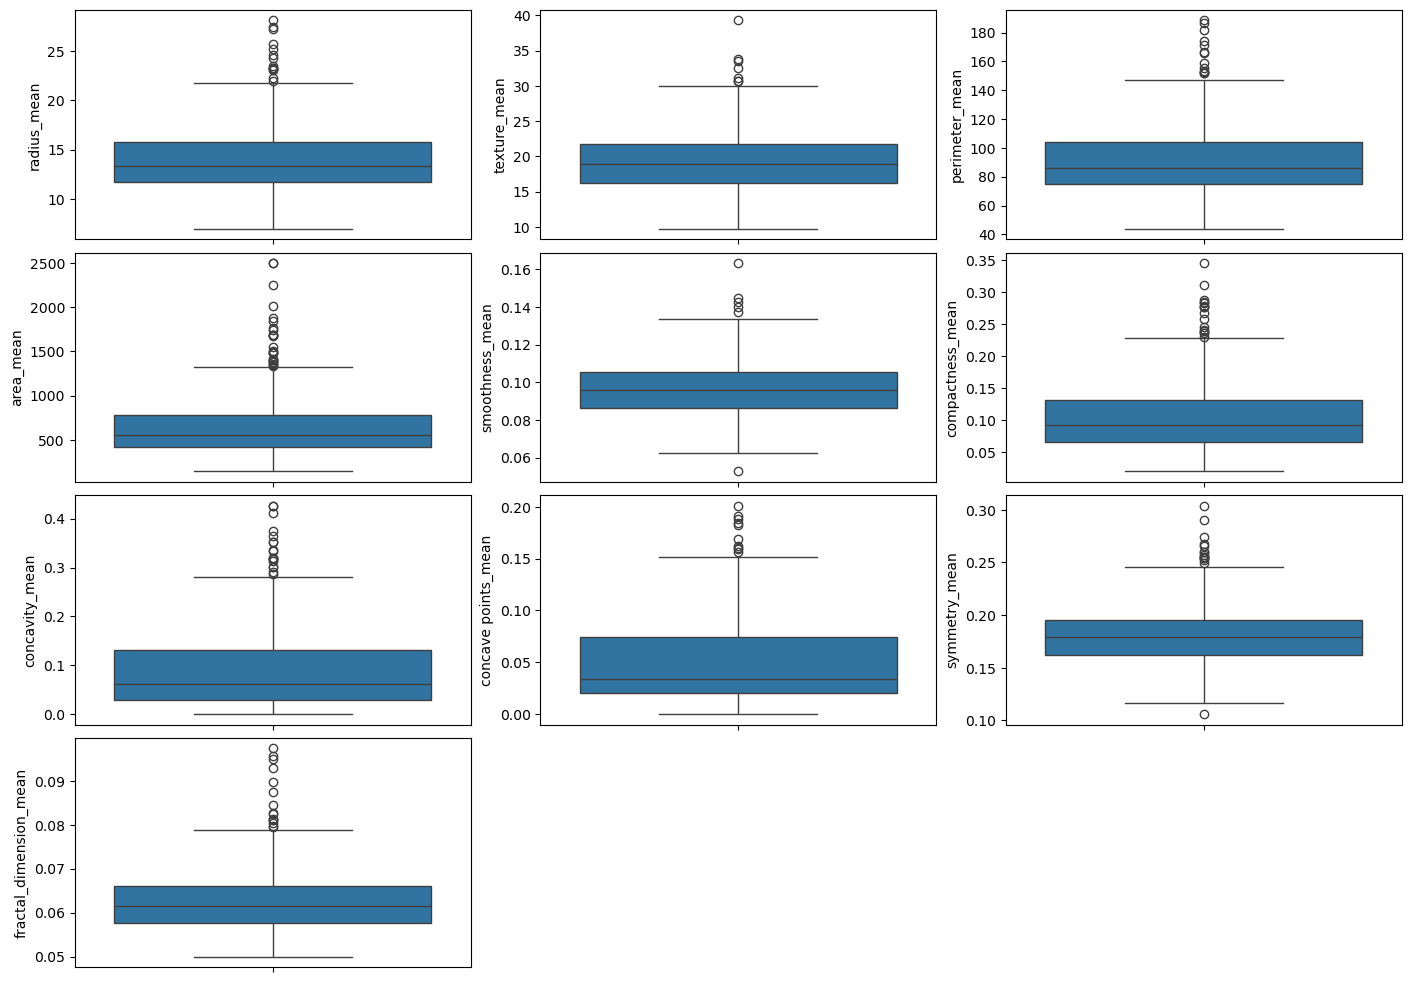

In [255]:
plt.figure(figsize=(14,12), layout="constrained")
plt.subplot(5,3,1)
sns.boxplot(data["radius_mean"])
plt.subplot(5,3,2)
sns.boxplot(data["texture_mean"])
plt.subplot(5,3,3)
sns.boxplot(data["perimeter_mean"])
plt.subplot(5,3,4)
sns.boxplot(data["area_mean"])
plt.subplot(5,3,5)
sns.boxplot(data["smoothness_mean"])
plt.subplot(5,3,6)
sns.boxplot(data["compactness_mean"])
plt.subplot(5,3,7)
sns.boxplot(data["concavity_mean"])
plt.subplot(5,3,8)
sns.boxplot(data["concave points_mean"])
plt.subplot(5,3,9)
sns.boxplot(data["symmetry_mean"])
plt.subplot(5,3,10)
sns.boxplot(data["fractal_dimension_mean"])
plt.show()

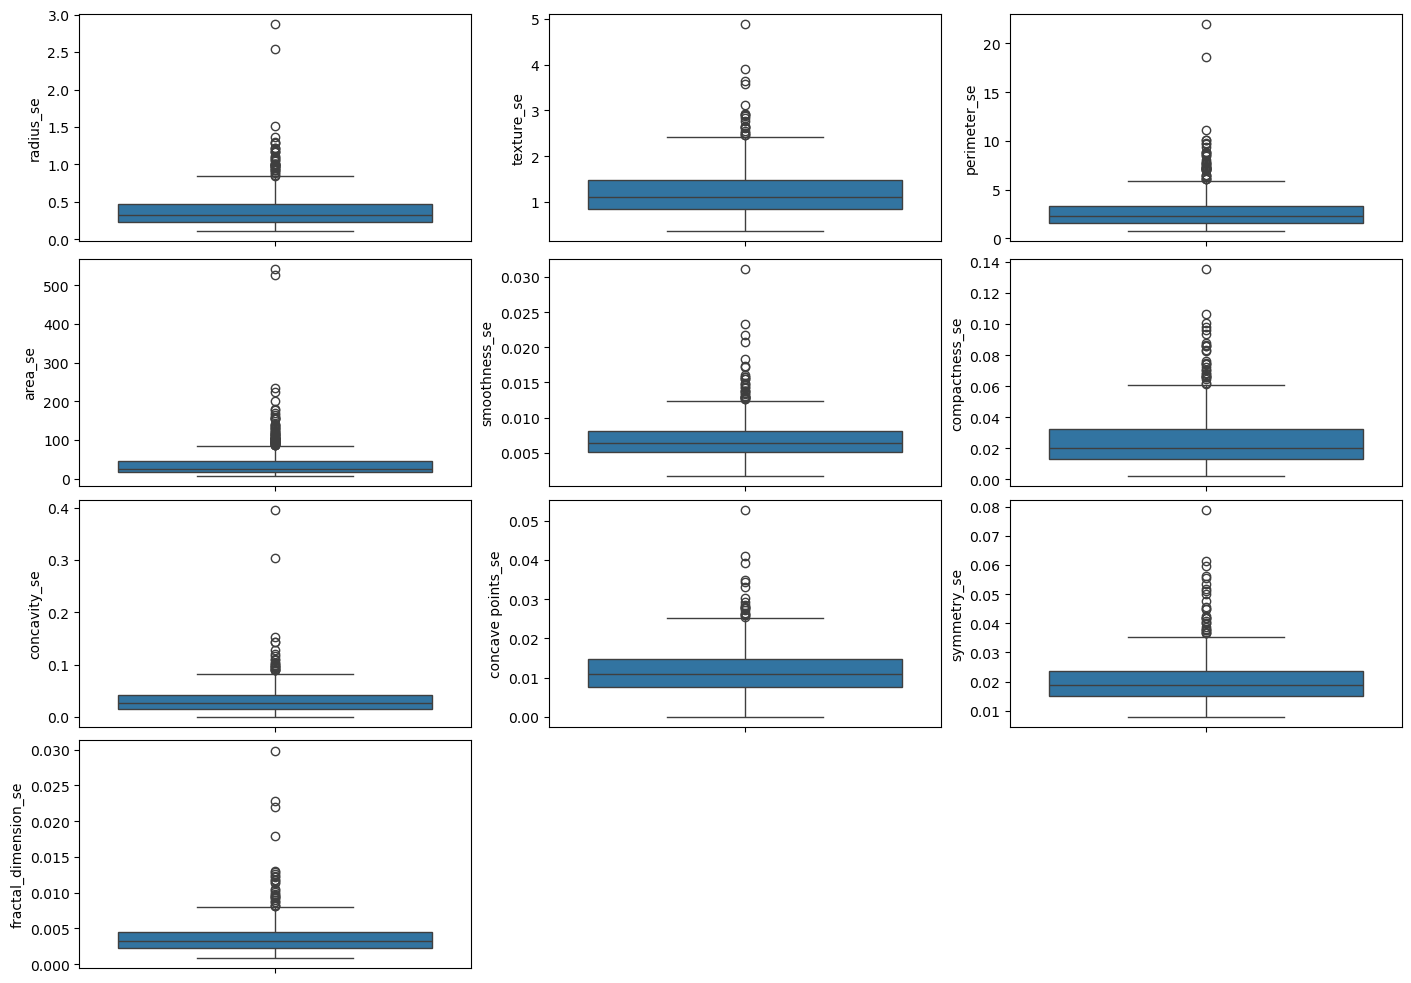

In [256]:
plt.figure(figsize=(14,12), layout="constrained")
plt.subplot(5,3,1)
sns.boxplot(data["radius_se"])
plt.subplot(5,3,2)
sns.boxplot(data["texture_se"])
plt.subplot(5,3,3)
sns.boxplot(data["perimeter_se"])
plt.subplot(5,3,4)
sns.boxplot(data["area_se"])
plt.subplot(5,3,5)
sns.boxplot(data["smoothness_se"])
plt.subplot(5,3,6)
sns.boxplot(data["compactness_se"])
plt.subplot(5,3,7)
sns.boxplot(data["concavity_se"])
plt.subplot(5,3,8)
sns.boxplot(data["concave points_se"])
plt.subplot(5,3,9)
sns.boxplot(data["symmetry_se"])
plt.subplot(5,3,10)
sns.boxplot(data["fractal_dimension_se"])
plt.show()

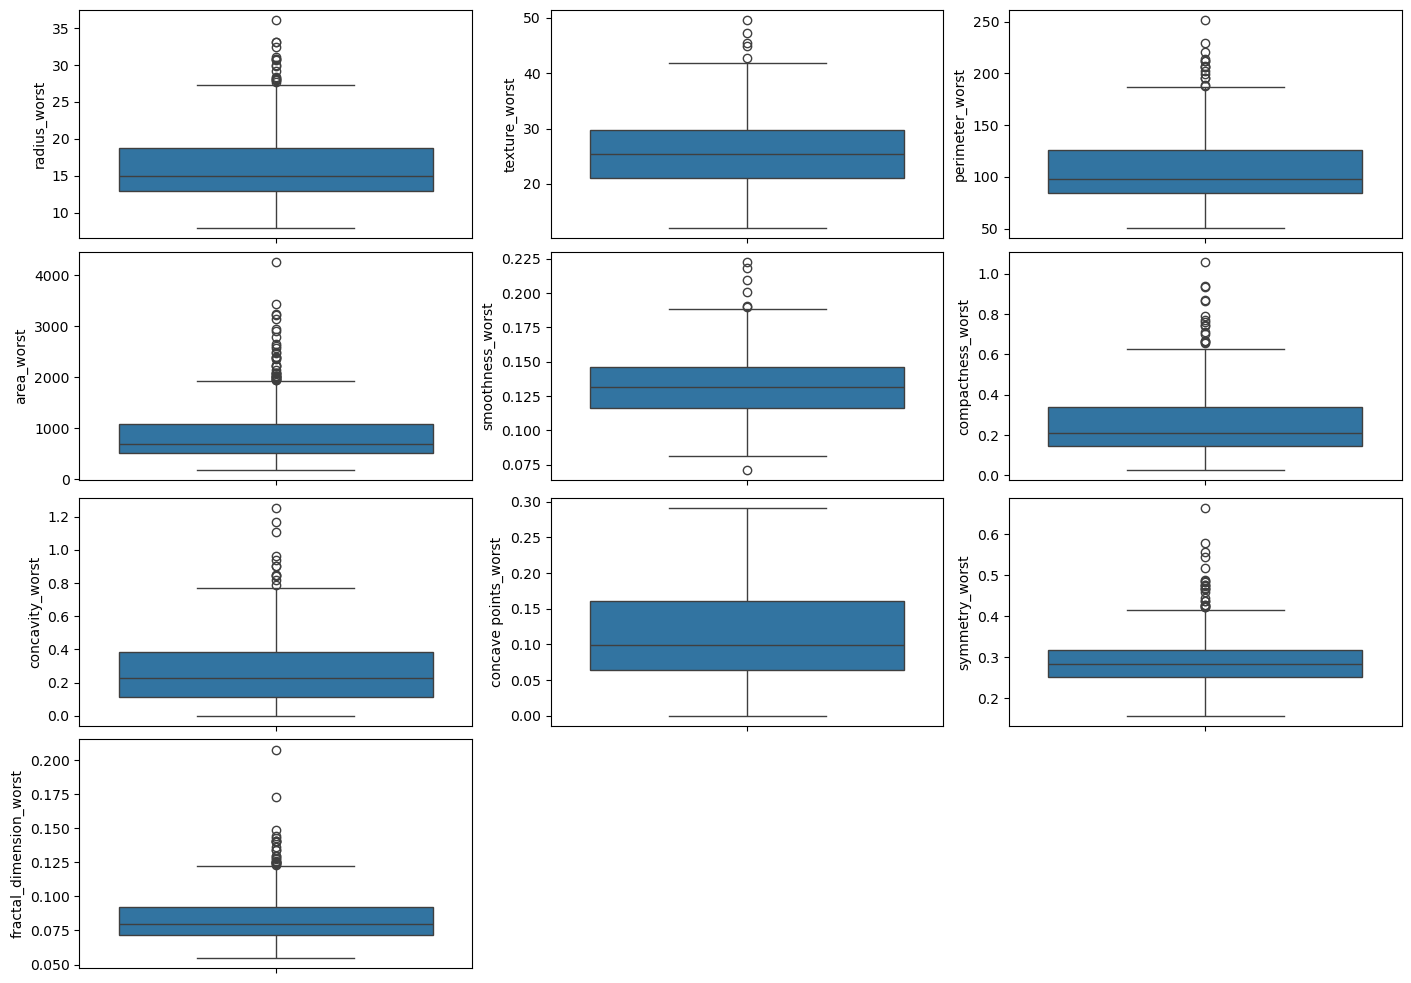

In [257]:
plt.figure(figsize=(14,12), layout="constrained")
plt.subplot(5,3,1)
sns.boxplot(data["radius_worst"])
plt.subplot(5,3,2)
sns.boxplot(data["texture_worst"])
plt.subplot(5,3,3)
sns.boxplot(data["perimeter_worst"])
plt.subplot(5,3,4)
sns.boxplot(data["area_worst"])
plt.subplot(5,3,5)
sns.boxplot(data["smoothness_worst"])
plt.subplot(5,3,6)
sns.boxplot(data["compactness_worst"])
plt.subplot(5,3,7)
sns.boxplot(data["concavity_worst"])
plt.subplot(5,3,8)
sns.boxplot(data["concave points_worst"])
plt.subplot(5,3,9)
sns.boxplot(data["symmetry_worst"])
plt.subplot(5,3,10)
sns.boxplot(data["fractal_dimension_worst"])
plt.show()

In [258]:
# data.select_dtypes(include="number").columns.tolist()

In [260]:
mean=['id',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']
se=['radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se']
worst=['radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
'fractal_dimension_worst']

### Multivariate Analysis

#### Pairplot

- The pairplot displays scatterplots and histograms for numerical features, helping visualize relationships, trends, and potential correlations. It also reveals class separation patterns and clustering tendencies between benign and malignant tumors.

<Figure size 1500x1000 with 0 Axes>

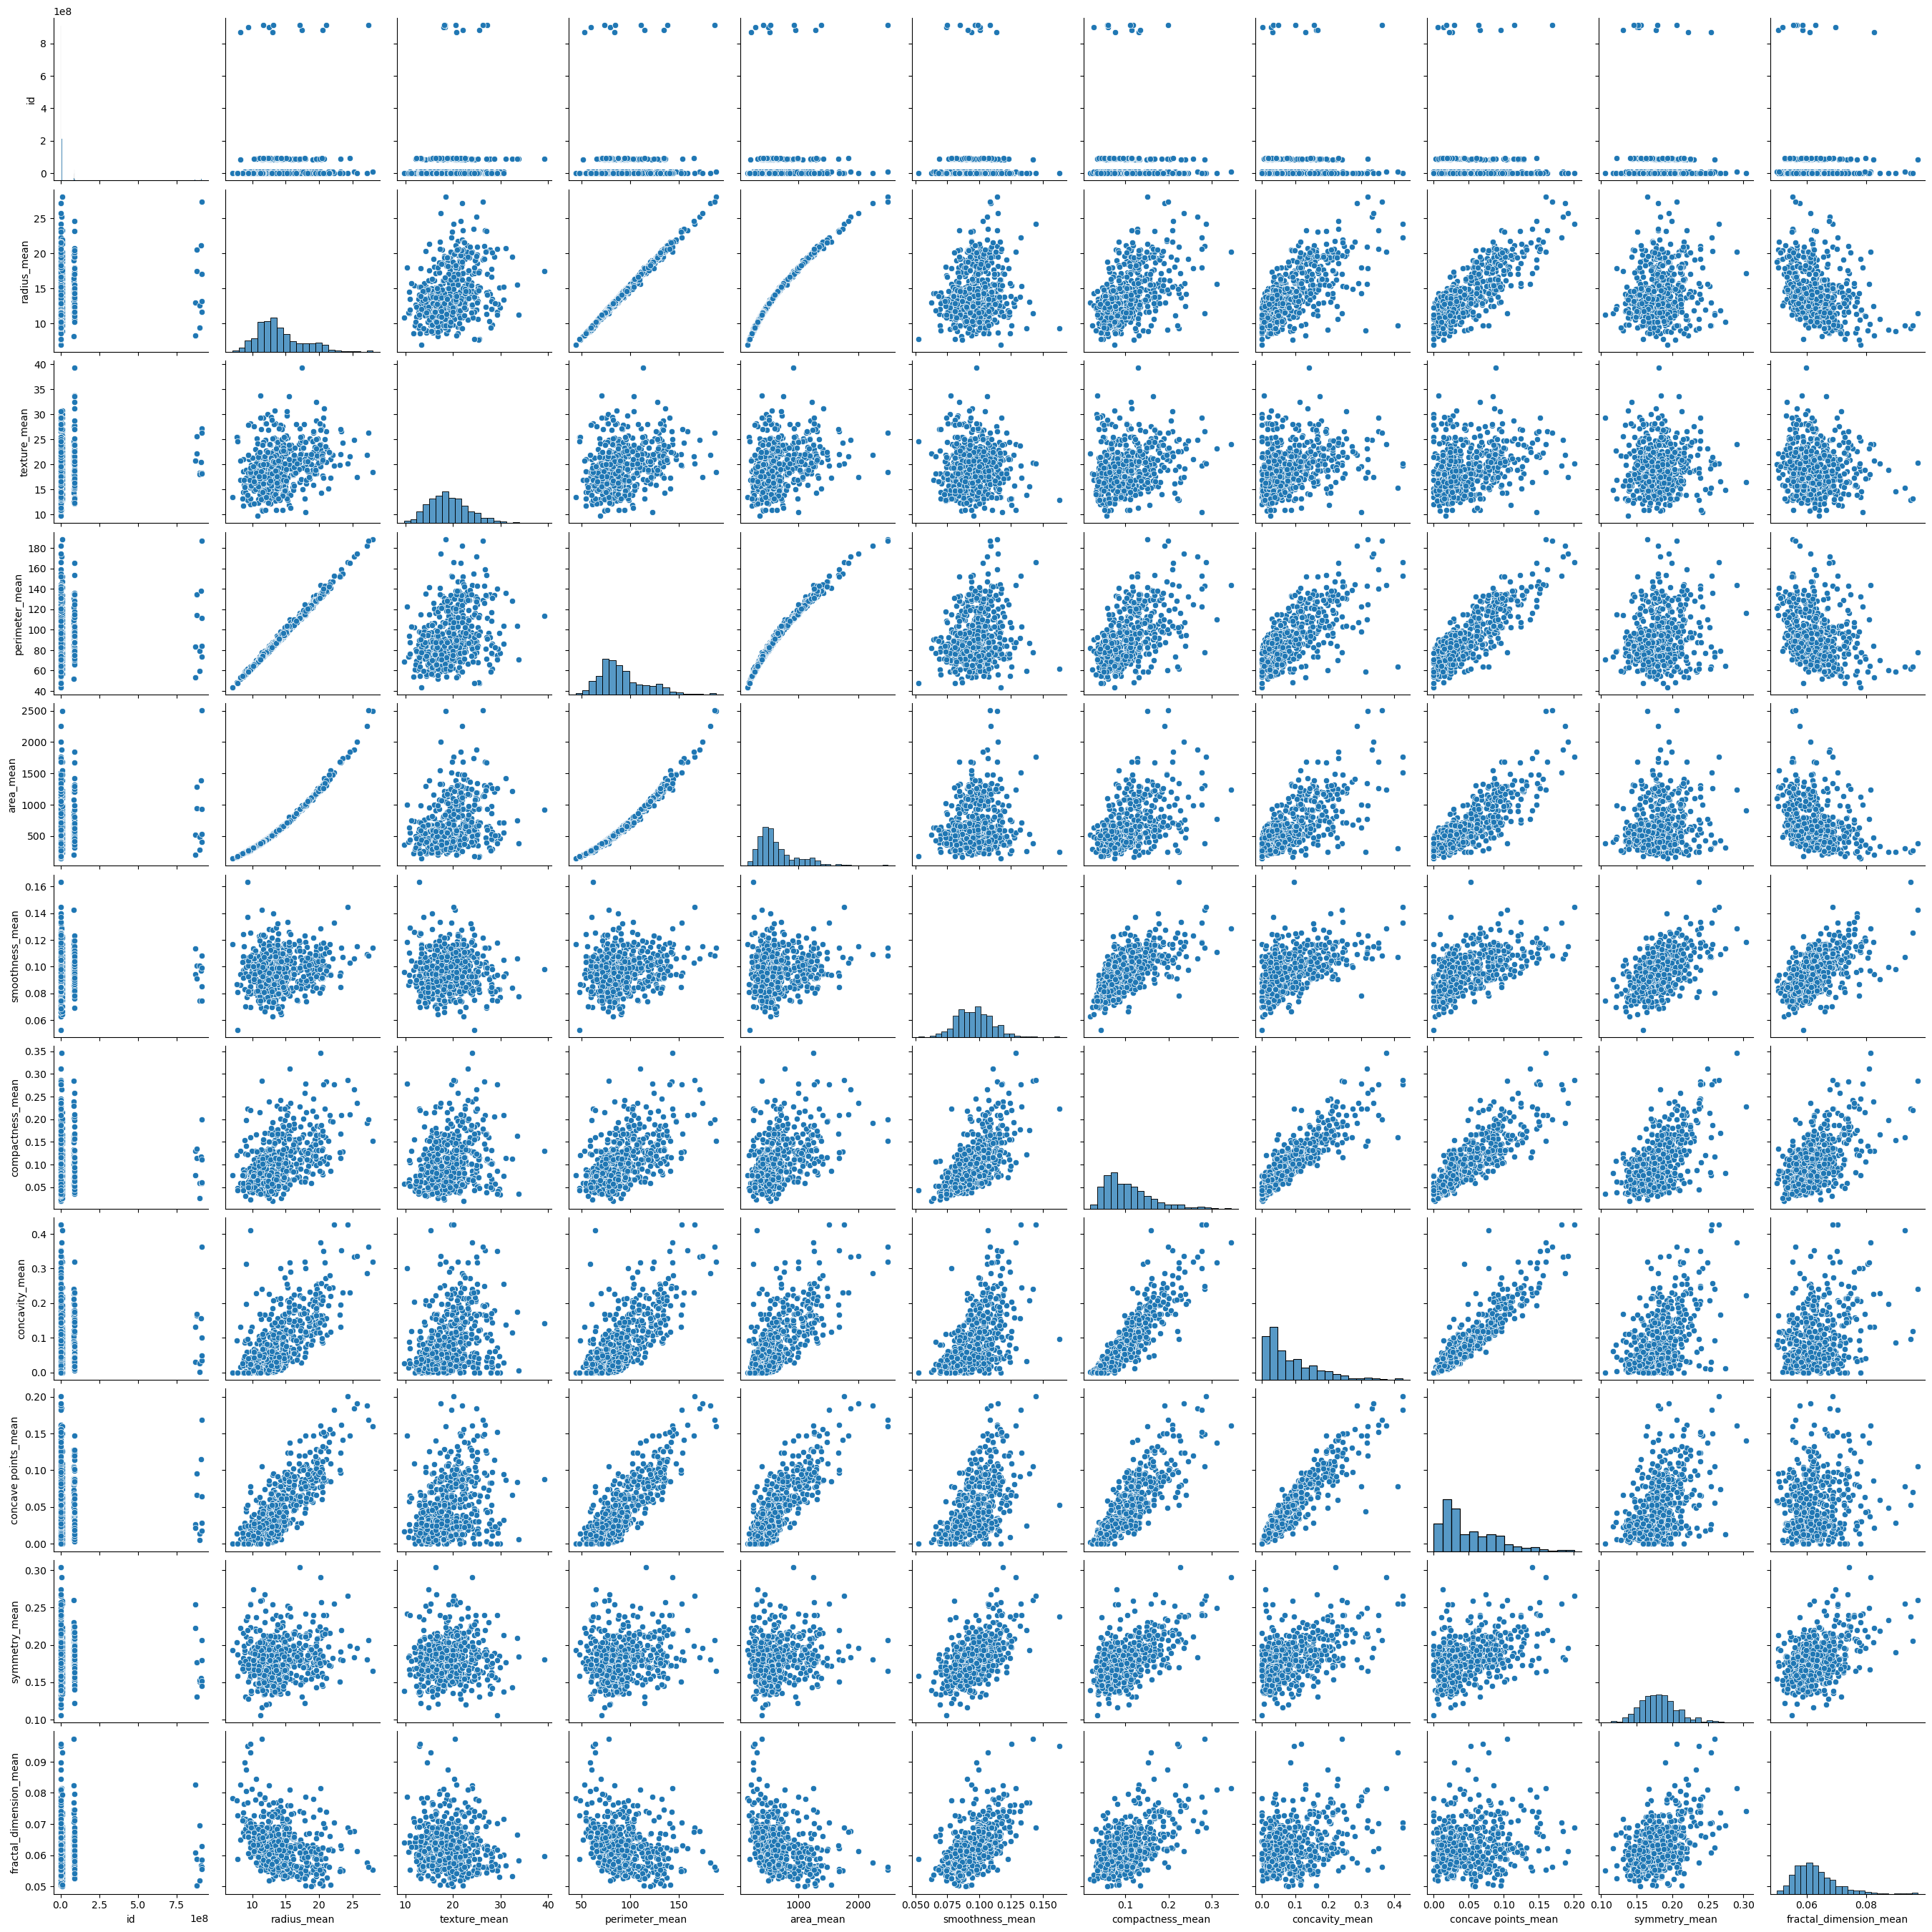

In [261]:
plt.figure(figsize=(15,10))
sns.pairplot(data[mean])
plt.show()

<Figure size 1500x1000 with 0 Axes>

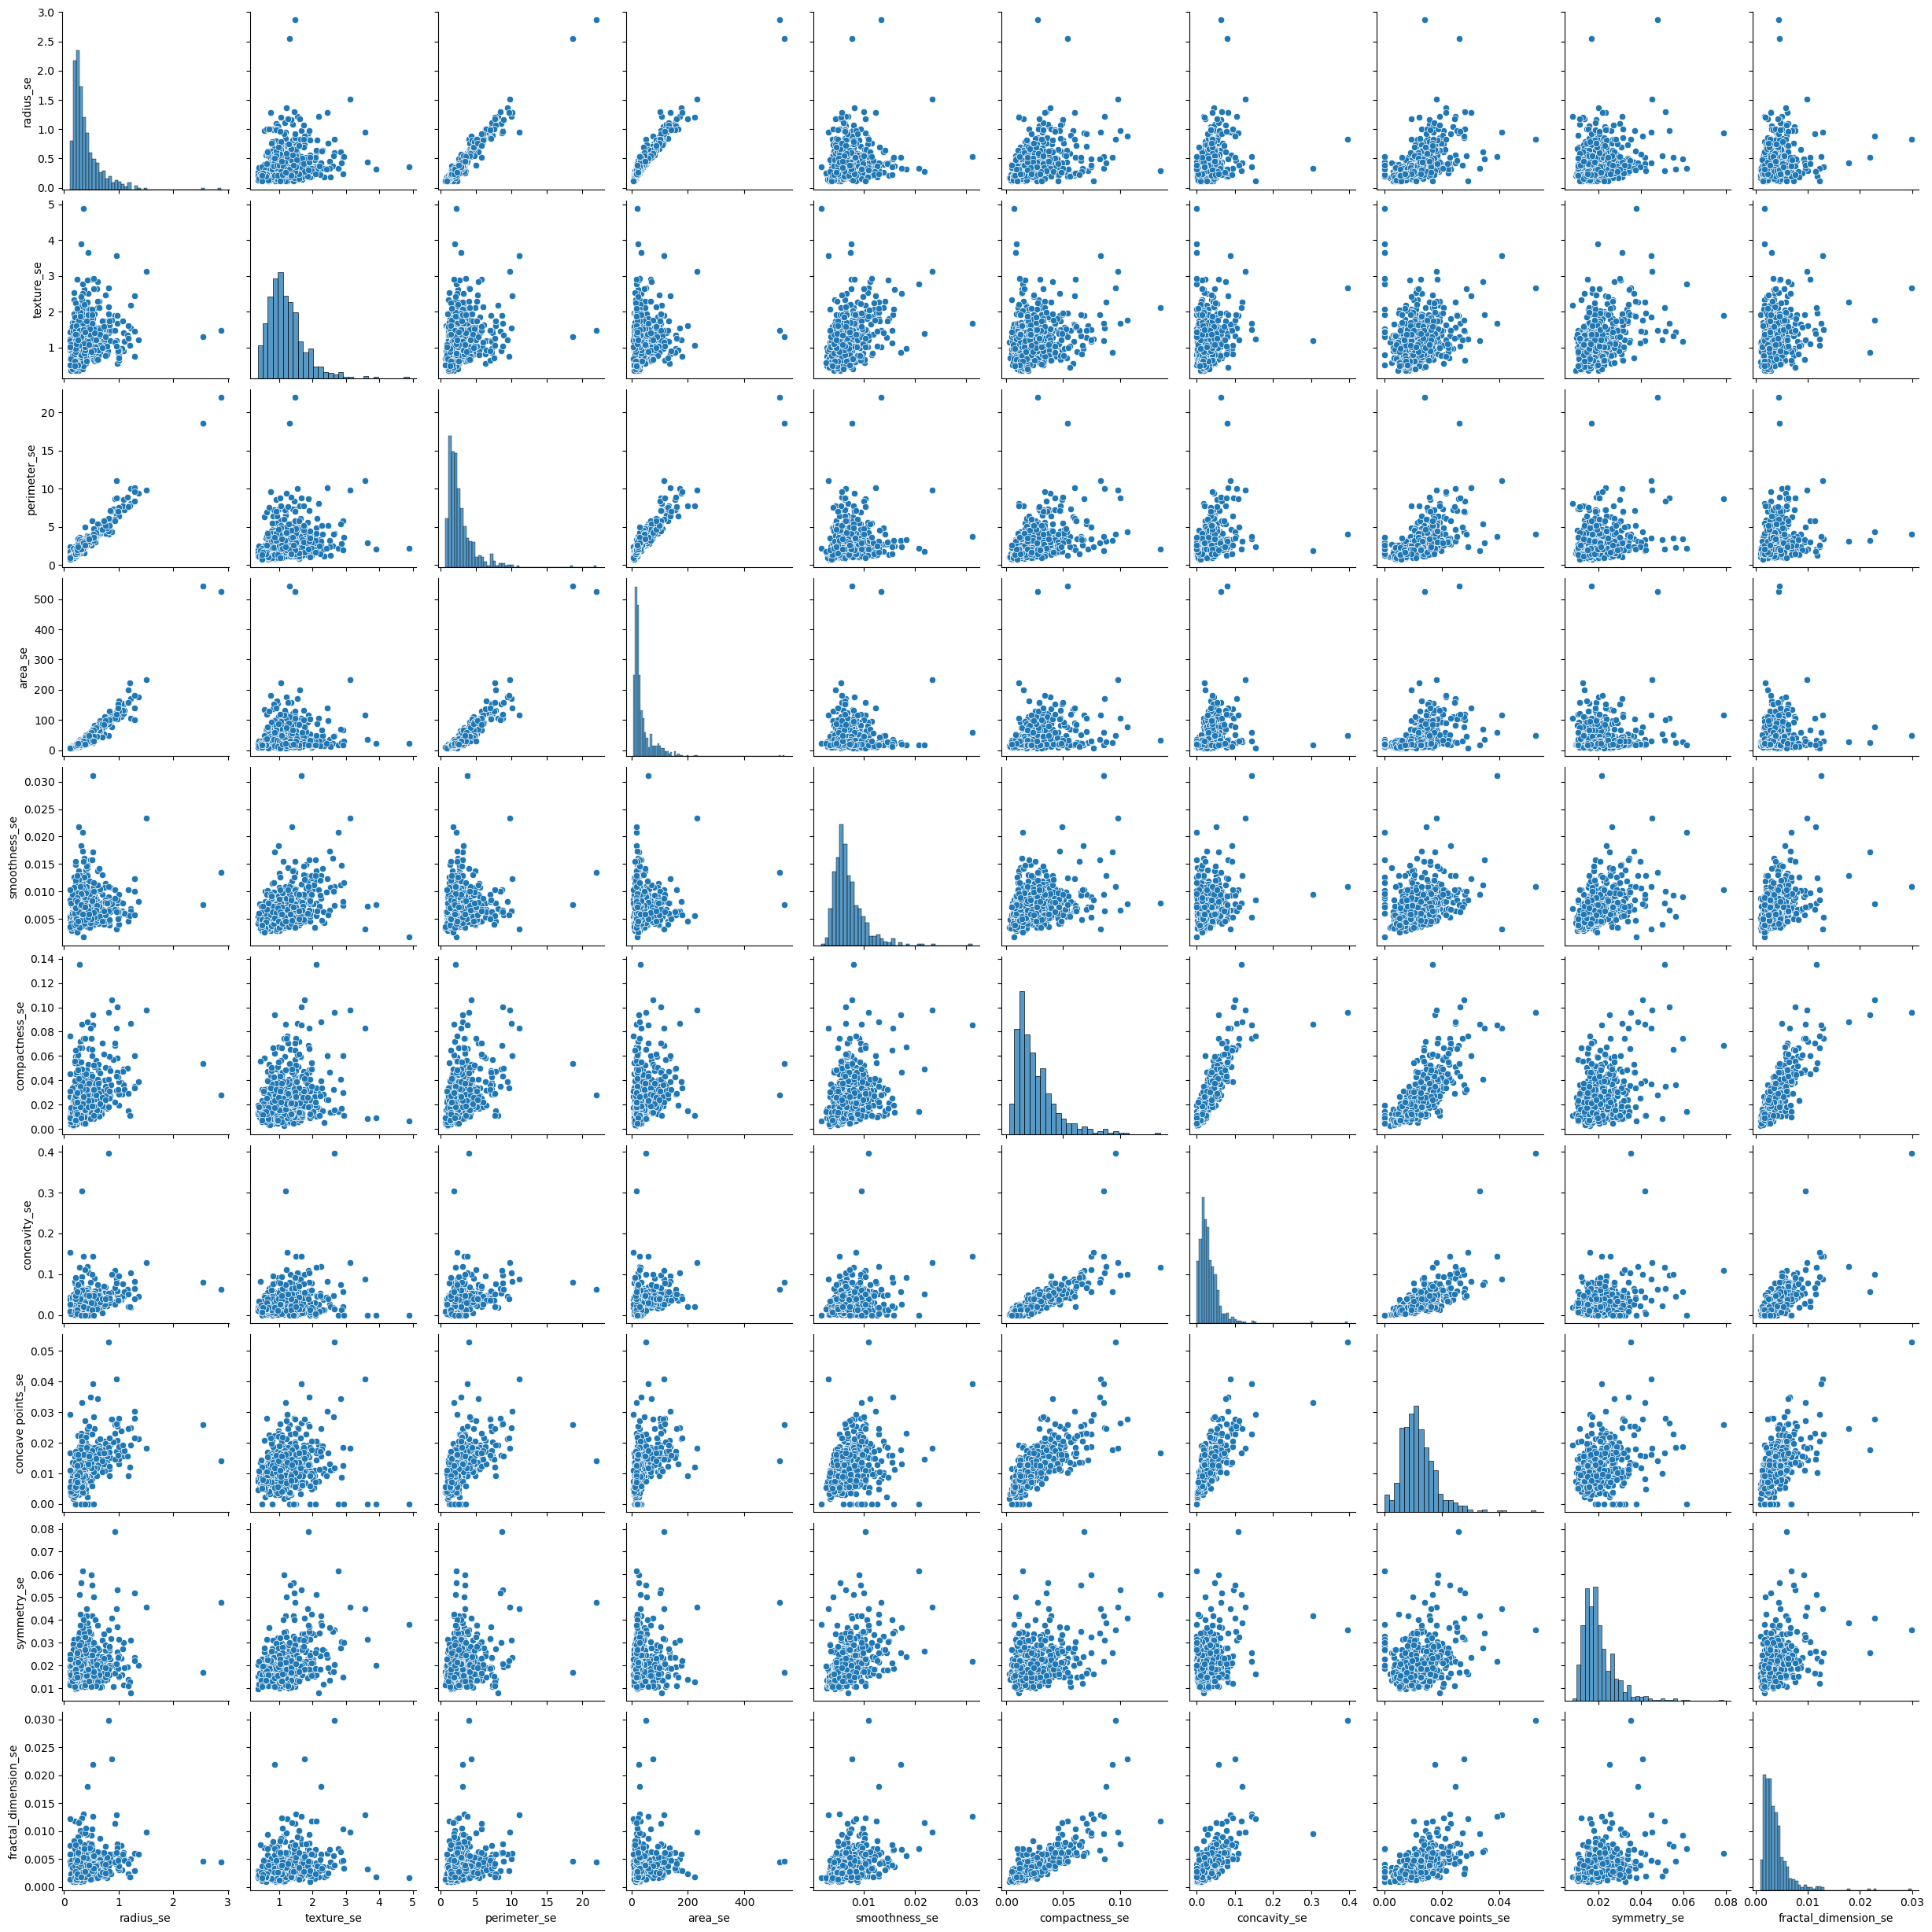

In [262]:
plt.figure(figsize=(15,10))
sns.pairplot(data[se])
plt.show()

<Figure size 1500x1000 with 0 Axes>

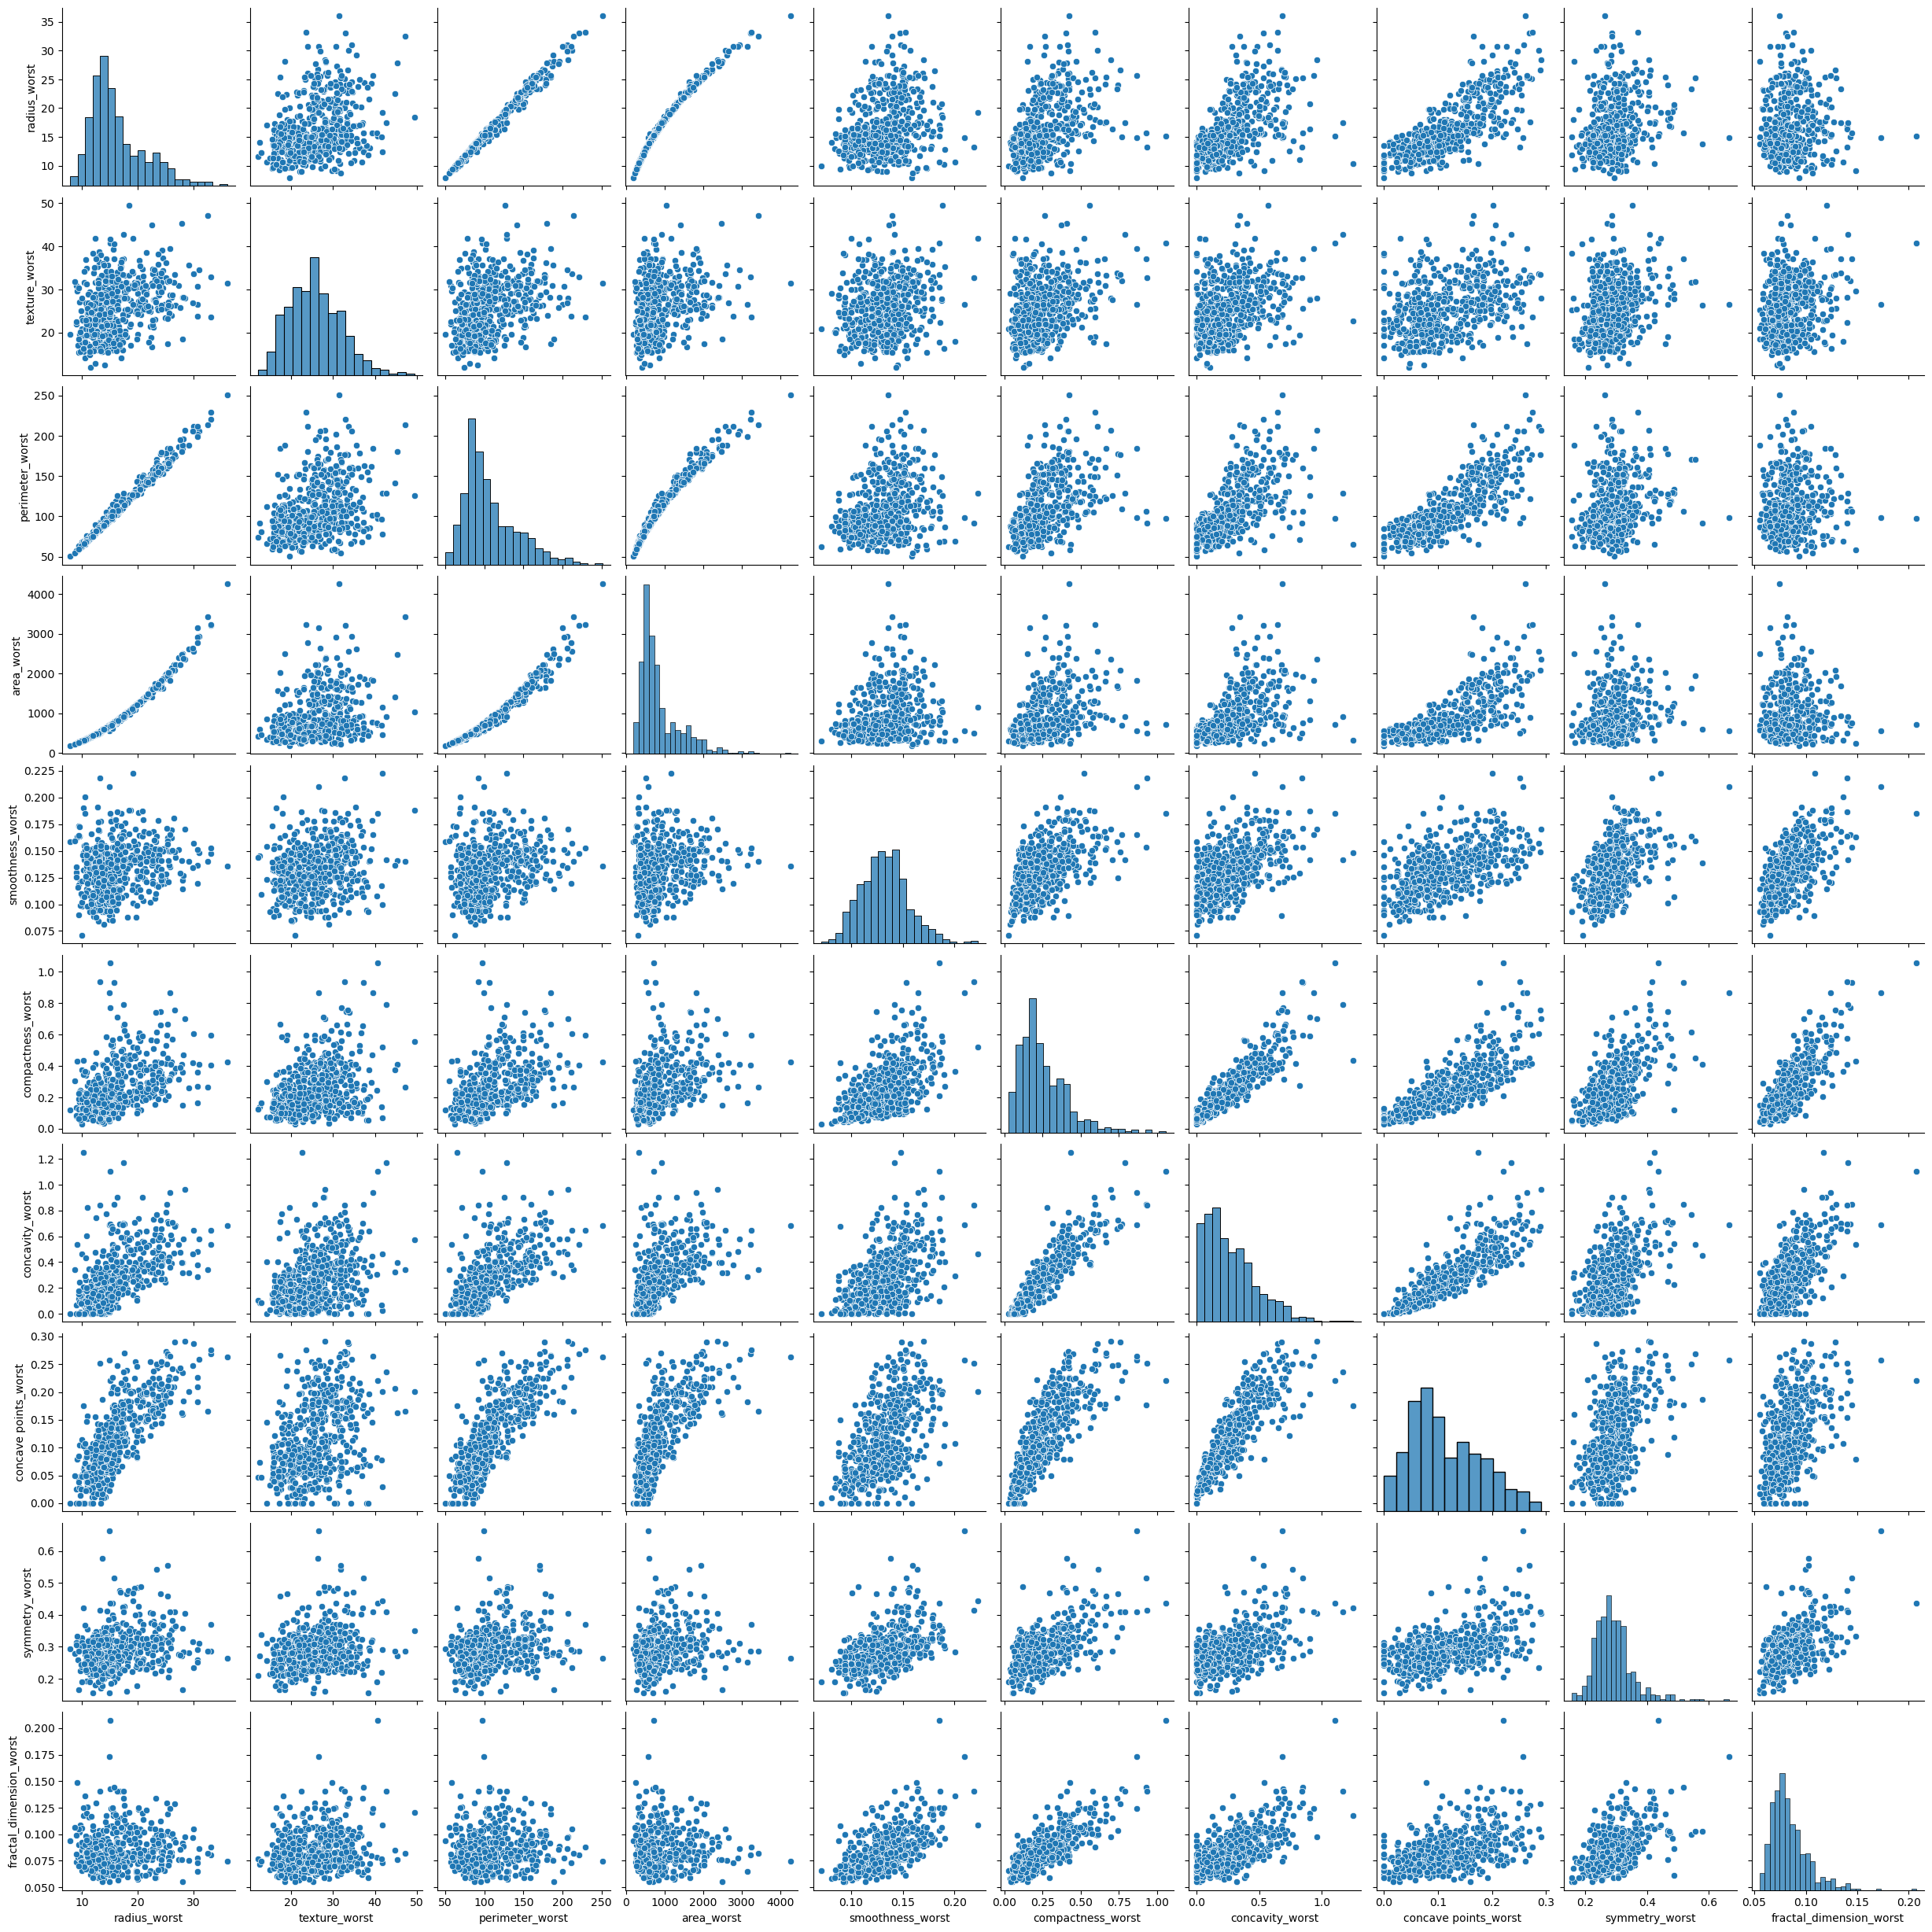

In [263]:
plt.figure(figsize=(15,10))
sns.pairplot(data[worst])
plt.show()

#### Heatmap

- The heatmap illustrates the correlation matrix between numerical variables, highlighting both strong positive and negative relationships. Features like radius_mean, perimeter_mean, and area_mean show high positive correlation, indicating redundancy. Identifying such correlations is crucial for feature selection and reducing multicollinearity during model building.

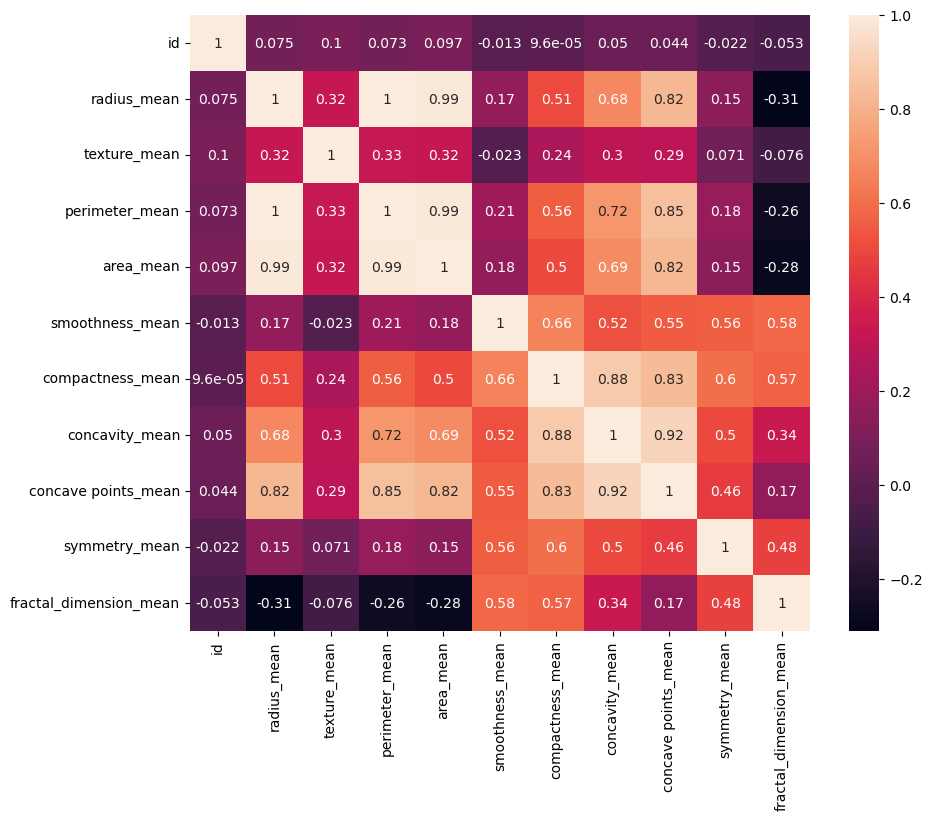

In [264]:
plt.figure(figsize=(10,8))
sns.heatmap(data[mean].corr(), annot=True)
plt.show()

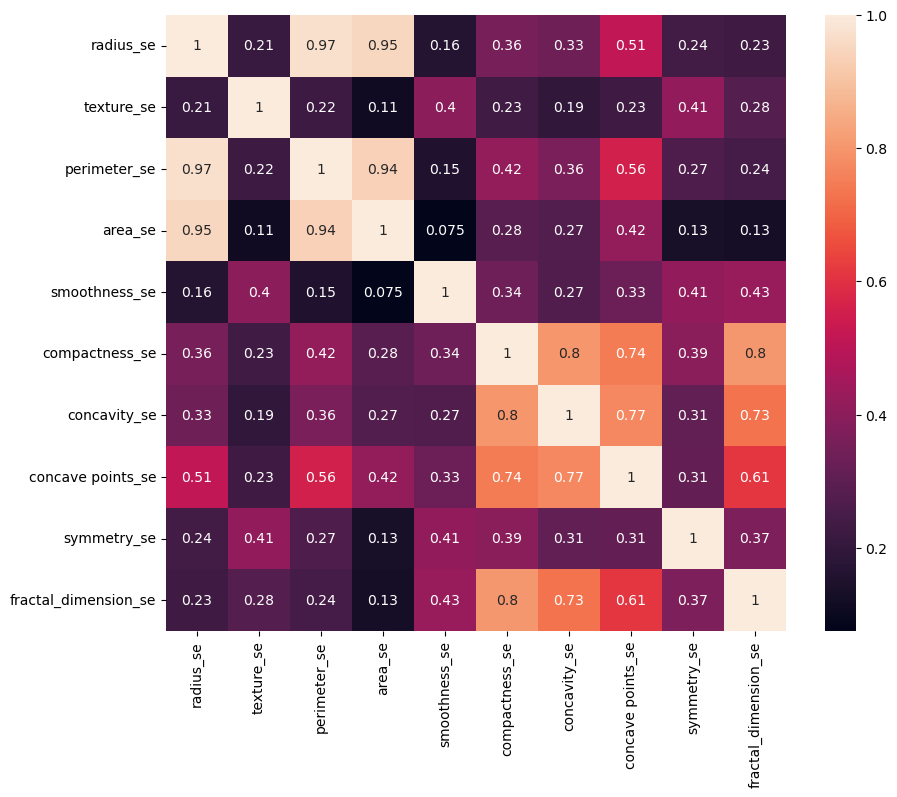

In [265]:
plt.figure(figsize=(10,8))
sns.heatmap(data[se].corr(), annot=True)
plt.show()

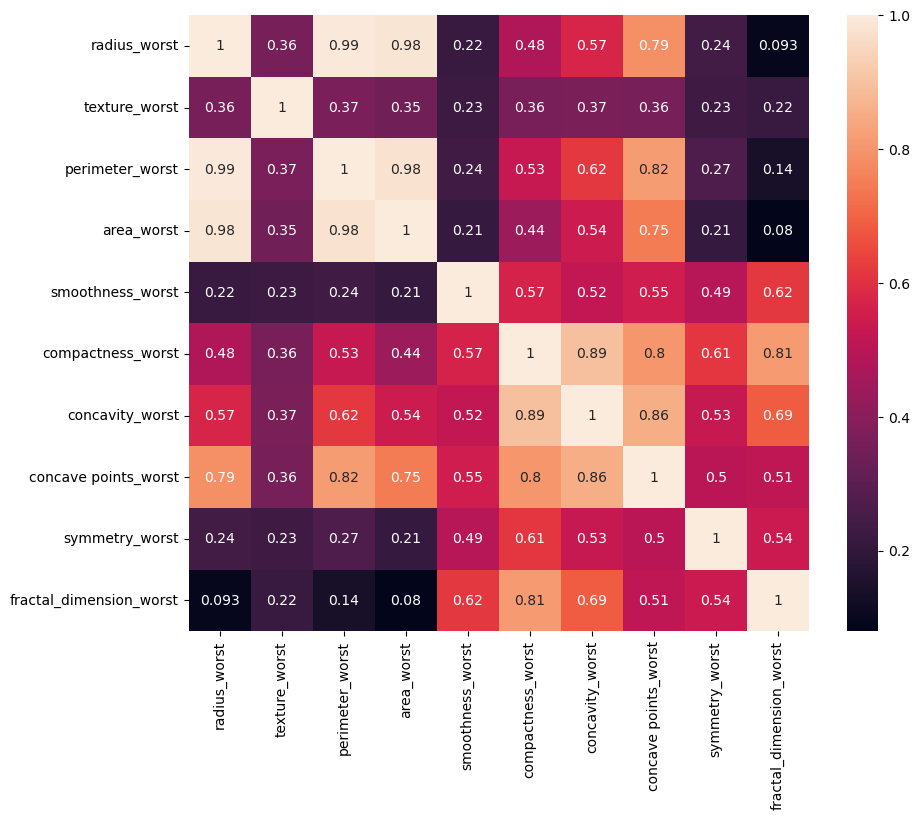

In [266]:
plt.figure(figsize=(10,8))
sns.heatmap(data[worst].corr(), annot=True)
plt.show()

In [267]:
# plt.figure(figsize=(25,20))
# sns.heatmap(data.corr(numeric_only=True), annot=True)
# plt.show()

#### Check unique values for target column
- The target column contains 357 instances of class 0 (benign) and 212 instances of class 1 (malignant), showing a slight class imbalance. This distribution should be considered during model evaluation to ensure balanced performance.

In [268]:
data.target.value_counts()

target
0    357
1    212
Name: count, dtype: int64

### Model Building Using K-Nearest Neighbors (KNN) Algorithm

#### Split features into independent and dependent variable
- The dataset is split into independent features (X) by dropping the target and 'id' columns, as 'id' is irrelevant for prediction. The dependent variable (y) consists of the encoded target values representing tumor type. This separation ensures a clean and structured input for model training and evaluation.

In [269]:
x=data.drop(["target","id"], axis=1)
y=data["target"]

In [270]:
x.shape

(569, 30)

In [271]:
y.shape

(569,)

In [272]:
y.value_counts()

target
0    357
1    212
Name: count, dtype: int64

#### train test split

- The dataset has been split using where 80% is used for training and 20% for testing to evaluate model performance. This split ensures the model learns from a majority of the data while being tested on unseen data for generalization.

In [273]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

- The training set consists of 455 samples with 30 features, while the test set contains 114 samples with the same number of features. This balanced split ensures the model is trained effectively and evaluated on a sufficient portion of unseen data.

In [274]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


- Both training and testing sets of independent variables have been standardized using StandardScaler to bring all features to a common scale. This helps improve the performance and convergence of many machine learning algorithms by eliminating bias from feature magnitude.

In [275]:
scaled=StandardScaler()
x_train_scaled=scaled.fit_transform(x_train)
x_test_scaled=scaled.transform(x_test)

- The KNeighborsClassifier has been instantiated to build a model based on proximity to neighboring data points. This algorithm is effective for classification tasks, especially when the data is well-scaled and patterns are locally grouped.

In [276]:
knn=KNeighborsClassifier(n_neighbors=11)

- The KNeighborsClassifier has been fitted on the scaled training data, allowing the model to learn patterns based on the distances between feature vectors. This training step prepares the model to make predictions on new, unseen data.

In [277]:
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=11)

- The trained KNN model achieved an accuracy score of 96% on the test data, indicating high prediction performance. This suggests the model effectively distinguishes between benign and malignant tumors based on the given features.

In [278]:
y_pred_test=knn.predict(x_test_scaled)
print(accuracy_score(y_test, y_pred_test))

0.956140350877193


In [279]:
scores=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred=knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

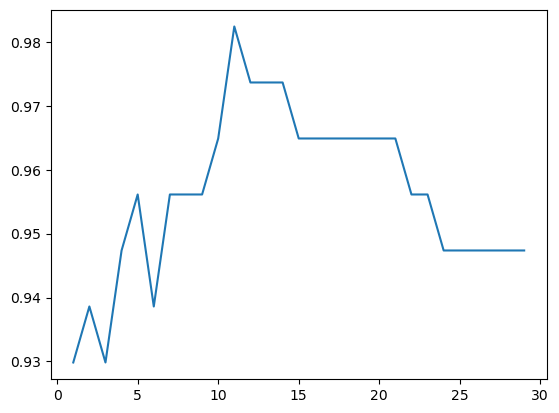

In [280]:
plt.plot(range(1,30), scores)

In [282]:
sample = [[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
           3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
           8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
           3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
           1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]]

# sample = np.array(sample).reshape(1, -1)
sample_scaled = scaled.transform(sample)
predicted_class = knn.predict(sample_scaled)
print(data.target[predicted_class][0])

1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
